# STA 141B Assignment 3

Due __Feb 11, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using web APIs and combining data from multiple sources.

## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

In [45]:
import requests
import requests_cache
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
requests_cache.install_cache("mycache")

In [12]:
#input the key
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")
#my key
key = read_key("key.txt")

In [13]:
def ndb_search(q):
    '''This is the function return search result when we give a item.'''
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = { #request from link
    "api_key": key, #key
    "q":q  #the item name
    })
    # if there have error return empty list
    if list(response.json().keys())[0]=="errors":  
        return []
    else:
        return response.json()['list']['item'] # otherwise return the item
ndb_search("quail eggs")

[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Pro

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [17]:
# import data
fresh = pd.read_csv("../assignment-3-hushuli/fresh.csv")

def food_item(item):
    '''This function return the most first qualified item information.'''
    item = item.replace("_", " ") #replace spical case to the blank 
    if item == "kiwi": 
        result = ndb_search(item) 
    #Since kiwi with "raw" will return empty So this if statement will avoid the empty item
    else:
        result = ndb_search(item + " raw") # other item using item and raw
        
    food = pd.DataFrame(result) # convert to the data frame
    #filter the words not helpful
    food["name"] = food["name"].str.lower() # convert info into lower case
    food = food[~food['name'].str.contains('juice')] # remove the item contains juice
    food = food[~food['name'].str.contains('jerusalem')] # remove the item contains jerusalem
    food = food[~food['name'].str.contains('upc')] # remove the item contains upc
    food = food[~food['name'].str.contains('babyfood')] #remove the item contains upc
    #food = food[~food['group'].str.contains('Branded')]
   
    return food.head(1) # return the most qualified itme information

In [32]:
# this loop return a itme info list according to the food name in fresh csv 
x = []
for i in fresh["food"]:
    x += [food_item(i)] # loop in the function
results = pd.concat(x) # concate!!
results.head()

,ds,group,manu,name,ndbno,offset
0,SR,Fruits and Fruit Juices,none,"watermelon, raw",09326,0
0,SR,Fruits and Fruit Juices,none,"melons, cantaloupe, raw",09181,0
1,SR,Fruits and Fruit Juices,none,"tangerines, (mandarin oranges), raw",09218,1
0,SR,Fruits and Fruit Juices,none,"strawberries, raw",09316,0
0,SR,Fruits and Fruit Juices,none,"plums, raw",09279,0


In [31]:
# slice the name and ndbno from results dataset
index = results.iloc[:,3:5]
# convert to dataframe
index = pd.DataFrame(index)
# reset the index
index = index.reset_index()
# merge index into the fresh data set
new_fresh = fresh.merge(index,left_index = True, right_index = True)

new_fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,index,name,ndbno
0,Fresh1,0.316639,0.52,0.330693,0.201366,watermelon,fruit,0,"watermelon, raw",09326
1,Fresh1,0.520794,0.51,0.374786,0.382718,cantaloupe,fruit,0,"melons, cantaloupe, raw",09181
2,Fresh1,1.480396,0.74,0.407855,0.815929,tangerines,fruit,1,"tangerines, (mandarin oranges), raw",09218
3,Fresh1,2.508450,0.94,0.319670,0.853060,strawberries,fruit,0,"strawberries, raw",09316
4,Fresh1,1.987999,0.94,0.363763,0.769319,plums,fruit,0,"plums, raw",09279


## Strategy for get the ndb number:

The function **food_item** can get most of food information in the USDA database according the food name in fresh.csv.

Then I use **food name + "raw"** as search keywords to get fresh food information. It works for the most of food. but there have some problems: 

1. Kiwi return a empty element, so there need a coundition for kiwi item. 
2. Since there have a lot of food name has " _ " in fresh,csv, It cause the item search not accuracy so it is nesserery to replace " _ " to the blank at first before we do the search.

Look at the list I got, I realize there also have some keywords need filter out, like: juice, jerusalem, babyfood, upc etc.

But there also have 2 problems:

1. The Kiwi still can not get right information. I tried to filter out the the "brand" from group in fresh.csv. But it return a empty list. So I assume the kiwi missing ndb number.
2. For the food have peel and unpeel, I tread them same.

After I got all food ndb number, I combined the data with fresh.csv.

__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

In [34]:
def ndb_report(ndbno):
    '''This function return the food report according to the given food ndb number.'''
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
        "api_key": key, # request key
        "ndbno":ndbno # request ndb number
        })
    return response.json()['foods'][0]['food']['nutrients']
ndb_report("09279") # test

[{'nutrient_id': '255',
  'name': 'Water',
  'derivation': 'NONE',
  'group': 'Proximates',
  'unit': 'g',
  'value': '87.23',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '143.93'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '57.57'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '131.72'}]},
 {'nutrient_id': '208',
  'name': 'Energy',
  'derivation': 'NC',
  'group': 'Proximates',
  'unit': 'kcal',
  'value': '46',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '76'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '30'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '69'}]},
 {'nutrient_id': '203',
  'name': 'Protein',
  'derivation': 'NONE',
  'group': 'Proximates',


__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

In [37]:
# Q1: Are fruits typically higher in kilocalories, or vegetables?

fruit = new_fresh[new_fresh['type'] == 'fruit']
vegetable = new_fresh[new_fresh['type'] == 'vegetables']

def kcal(ndb):
    
    nutrient = pd.DataFrame(ndb_report(ndb))

    return nutrient['value'][nutrient["name"] == 'Energy']

#fruit energy
fruit_energy = fruit['ndbno'].apply(kcal)

#vegetable energy
vegetable_energy = vegetable['ndbno'].apply(kcal)

new_fresh.loc[new_fresh['type']=='fruit','kcal']=fruit_energy.iloc[:,0]
new_fresh.loc[new_fresh['type']=='vegetables','kcal']=vegetable_energy.iloc[:,0]
new_fresh['kcal'] = pd.to_numeric(new_fresh['kcal'])

new_fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,index,name,ndbno,kcal
0,Fresh1,0.316639,0.52,0.330693,0.201366,watermelon,fruit,0,"watermelon, raw",09326,30.0
1,Fresh1,0.520794,0.51,0.374786,0.382718,cantaloupe,fruit,0,"melons, cantaloupe, raw",09181,34.0
2,Fresh1,1.480396,0.74,0.407855,0.815929,tangerines,fruit,1,"tangerines, (mandarin oranges), raw",09218,53.0
3,Fresh1,2.508450,0.94,0.319670,0.853060,strawberries,fruit,0,"strawberries, raw",09316,32.0
4,Fresh1,1.987999,0.94,0.363763,0.769319,plums,fruit,0,"plums, raw",09279,46.0


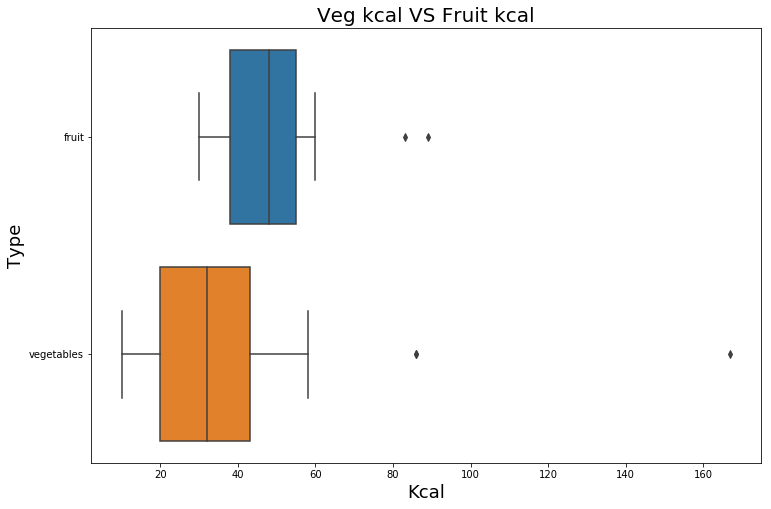

In [50]:
# plot for the kcal in veg and fruit
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)

sns.boxplot(x = "kcal", y = "type", data = new_fresh)
plt.xlabel('Kcal',fontsize=18)
plt.ylabel('Type',fontsize=18)
plt.title('Veg kcal VS Fruit kcal',fontsize=20)
plt.draw()

# Conclusion: Are fruits typically higher in kilocalories, or vegetables?

First, I seperated the fresh data as fruit and vegetable, then I wrote a kcal function which can get the kcal from nutrient. After apply fruit and vegetable in to the function, I got fruit energy and vegetable energy dataframes.

Then I put two data frame as one columne and conbined with fresh.csv dataframe. Then draw a box plot according to the kcal in each group.

From the boxplot we can see that the overall fruit kcal is higher than vegetable. The fruit kcal median around 50 and vegetable is only around 30. There is no obviously skew in the plot but we can see there have few outliers in vegetable kcal. That means only few type of vegetable have the high kcal.

Therefore, we can conclude that the fruit typically higher in kilocalories than vegetable.


In [72]:
# Q2: Which food provides the widest variety of nutrients?

# slice the ndb number
ndbno = new_fresh['ndbno']
# find the value from the food report according to the ndb numbers
x = []
for n in ndbno:
    '''This for loop return the value in the food report'''
    result = pd.DataFrame(ndb_report(n))['value'].astype(str).astype(float) 
    x.append(sum(result > 0)) # sum the values to get the count of nutrients then append to x    
value = pd.DataFrame(x) # convert to df

# creat a new col for the nutrients
new_fresh['number_nutrients'] = value 
new_fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,index,name,ndbno,kcal,number_nutrients
0,Fresh1,0.316639,0.52,0.330693,0.201366,watermelon,fruit,0,"watermelon, raw",09326,30.0,27
1,Fresh1,0.520794,0.51,0.374786,0.382718,cantaloupe,fruit,0,"melons, cantaloupe, raw",09181,34.0,27
2,Fresh1,1.480396,0.74,0.407855,0.815929,tangerines,fruit,1,"tangerines, (mandarin oranges), raw",09218,53.0,26
3,Fresh1,2.508450,0.94,0.319670,0.853060,strawberries,fruit,0,"strawberries, raw",09316,32.0,27
4,Fresh1,1.987999,0.94,0.363763,0.769319,plums,fruit,0,"plums, raw",09279,46.0,26


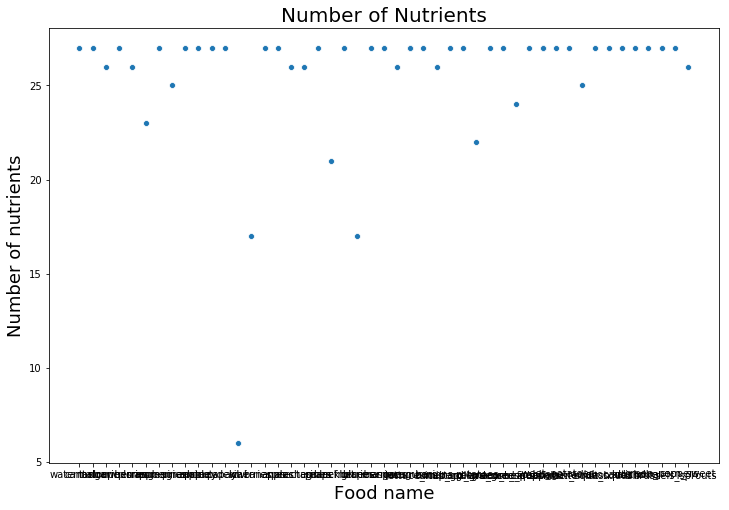

In [70]:
# plot
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)

sns.scatterplot(x = "food", y = "number_nutrients", data = new_fresh)
plt.xlabel('Food name',fontsize=18)
plt.ylabel('Number of nutrients',fontsize=18)
plt.title('Number of Nutrients',fontsize=20)

plt.draw()

# Conclusion: Which food provides the widest variety of nutrients?

First, I use ndb number from fresh.csv and apply it to the food report function to get all the food nutrients. Then I summed the all elements in nutrients greater than 0 to get the variety of nutrient. Then combine that into the fresh.csv data frame and plot the scatter plot for the numbers of nutrients in each food.

From this scatter plot, we can see a lot of food have 27 nutrients in the USDA database. Only one food have less than 10 nutrients and few are betweent 15-26. The most variety nutrients are 27 elements. After subsetting the nutrient number equal to 27, we can see all the food name of the widest variety of nutrients.
